In [28]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from src.sod_model import SODModel
import cv2

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model = SODModel().to(device)
model.load_state_dict(torch.load("models/best_model.pth", map_location=device))
model.eval()


Using device: cpu


SODModel(
  (enc1): ConvBlock(
    (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc2): ConvBlock(
    (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (enc3): ConvBlock(
    (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1)

In [29]:
image_path = "data/raw/ecssd/images/0558.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


img_resized = cv2.resize(image, (128, 128))
img_norm = img_resized / 255.0
img_tensor = torch.tensor(img_norm).permute(2, 0, 1).unsqueeze(0).float().to(device)


In [30]:
import time

start = time.time()
with torch.no_grad():
    pred = model(img_tensor)
end = time.time()

print("Inference time:", round(end - start, 4), "seconds")


Inference time: 0.0708 seconds


In [31]:
with torch.no_grad():
    pred = model(img_tensor)
    pred_bin = (pred > 0.4).float()[0,0].cpu().numpy()

pred_resized = cv2.resize(pred_bin, (image.shape[1], image.shape[0]))

overlay = image.copy()/255.0
overlay[...,0] = overlay[...,0] + pred_resized * 0.5
overlay = np.clip(overlay, 0, 1)


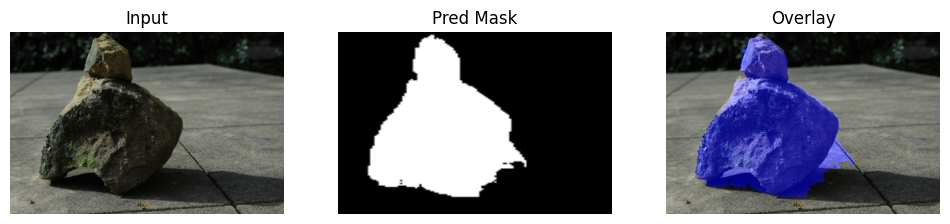

In [32]:
with torch.no_grad():
    pred = model(img_tensor)
    pred_bin = (pred > 0.4).float()[0,0].cpu().numpy()

pred_resized = cv2.resize(pred_bin, (image.shape[1], image.shape[0]))

overlay = image.copy() / 255.0
overlay[..., 2] = overlay[..., 2] + pred_resized * 0.5
overlay = np.clip(overlay, 0, 1)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(image); ax[0].set_title("Input"); ax[0].axis("off")
ax[1].imshow(pred_resized, cmap="gray"); ax[1].set_title("Pred Mask"); ax[1].axis("off")
ax[2].imshow(overlay); ax[2].set_title("Overlay"); ax[2].axis("off")
plt.show()
